# Tensegrity-structures
All functions and initial values are written in separate python-files, which we include here.

In [1]:
from energyFunctions import *
from solvers import *

## Cable-nets
Here we include two initializations. In the first we fix four nodes,
$$
P=\big((5,5,0), (-5,5,0), (-5,-5,0), (5, -5, 0) \big),
$$
and in the second we make a random initialization with 3 fixed nodes and 5 free to test our implementation.

# iterations = 10


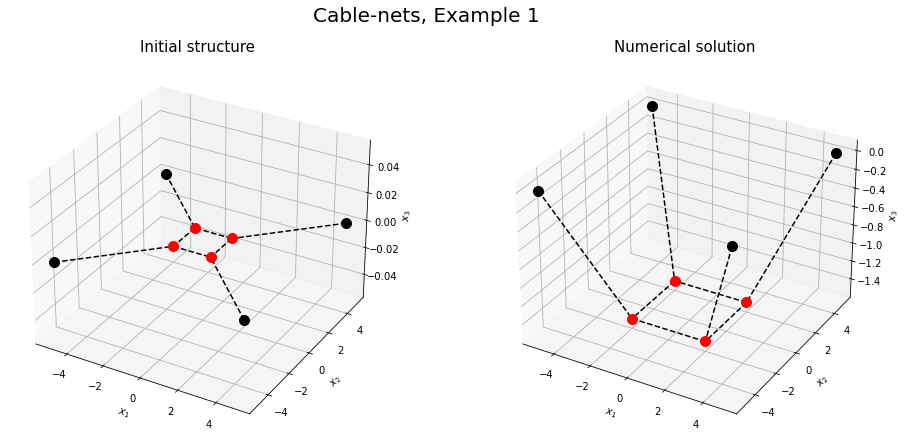

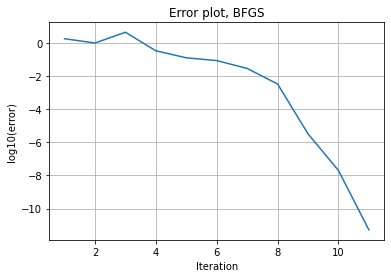


Numerical solution for the free nodes:
x5 = [ 2.   2.  -1.5]
x6 = [-2.   2.  -1.5]
x7 = [-2.  -2.  -1.5]
x8 = [ 2.  -2.  -1.5]



In [2]:
from initialCablenets import *

fun = lambda X: energyCablenets(X, C, L, el, k = 3)
grad = lambda X: gradientCablenets(X, C, L, el, k = 3, M = M1)

X, error_vals = BFGS(fun, grad, X_init, M = M1, tol = 1.e-8)
plot_result(X_init.reshape(N, 3), X, C, B, N, M1, title = 'Cable-nets, Example 1')
plot_error(error_vals, title="Error plot, BFGS")
print_result(X, N, M1)

### Example 2 - Random Initialization

# iterations = 54


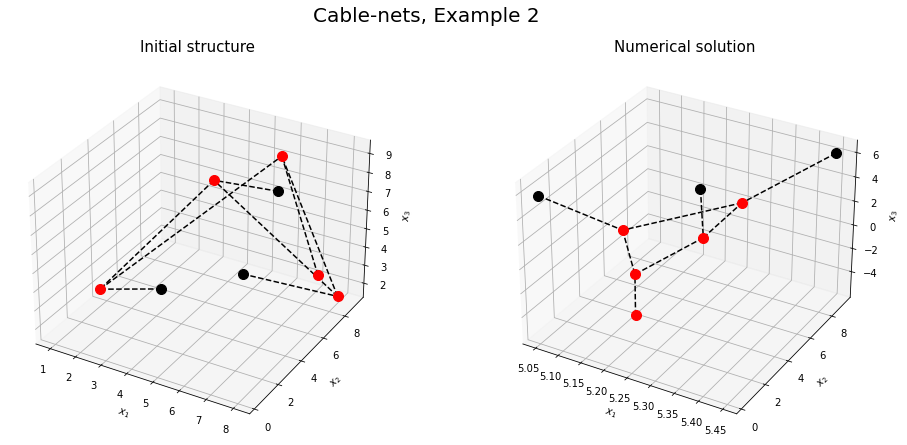

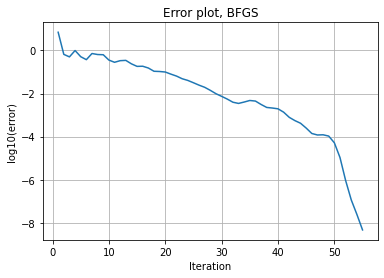

In [3]:
fun = lambda X: energyCablenets(X, C, L, el, k = 3)
grad = lambda X: gradientCablenets(X, C, L, el, k = 3, M = M2)

X, error_vals = BFGS(fun, grad, X_init_2, M2, tol = 1.e-8)
plot_result(X_init_2.reshape(N, 3), X, C, B, N, M2, title = 'Cable-nets, Example 2')
plot_error(error_vals, title="Error plot, BFGS")

## Tensegrity-domes
Here we include two initializations. In both we fix four nodes,
$$
P=\big((1,1,0), (-1,1,0), (-1,-1,0), (1, -1, 0) \big).
$$

### Example 1

# iterations = 386


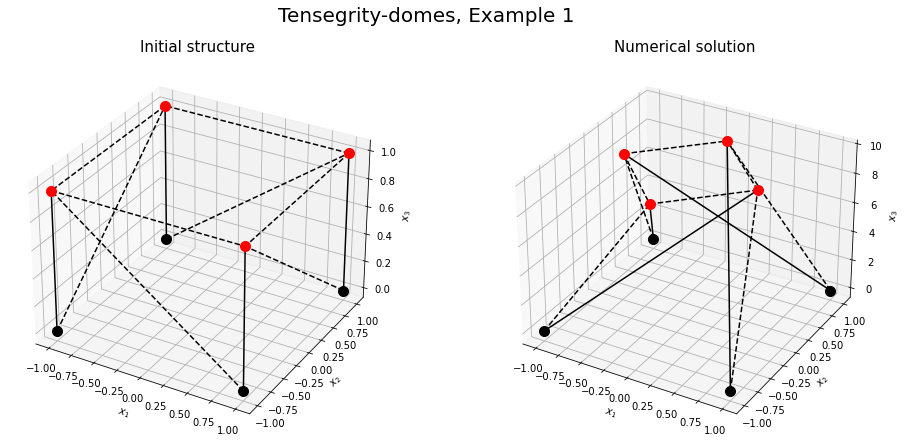

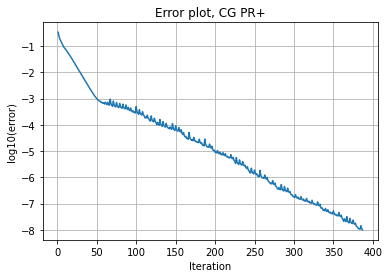

# iterations = 57


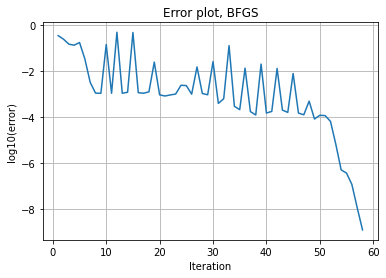

# iterations = 128
# iterations = 12


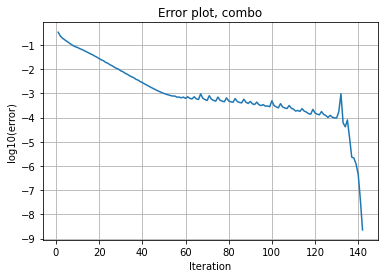

In [4]:
from initialTensegritydomes import *

fun = lambda X: energyTensegrityDomes(X, C, B, L, el, k = 0.1, c = 1, rhog = 0)
grad = lambda X: gradientTensegrityDomes(X, C, B, L, el, k = 0.1, c = 1, rhog = 0, M = M1)

# Plot initial structure, numerical structure and error plot using Conjugate Gradient with PR+
X1, error_vals = CG(fun, grad, X_init_1_dome, M1, tol = 1.e-8)
plot_result(X_init_1_dome.reshape(N,3), X1, C, B, N, M1, title = 'Tensegrity-domes, Example 1')
plot_error(error_vals, title="Error plot, CG PR+")
plt.show()

# Plot error plot using BFGS
from initialTensegritydomes import *
X, error_vals = BFGS(fun, grad, X_init_1_dome, M1, tol = 1.e-8)
plot_error(error_vals, title="Error plot, BFGS")
plt.show()

# Plot error using a combination of BFGS and CG
from initialTensegritydomes import *
X, error_vals = CG(fun, grad, X_init_1_dome, M1, tol = 1.e-4)
X2, error_vals2 = BFGS(fun, grad, X.flatten(), M1, tol = 1.e-8)
plot_error(np.concatenate([error_vals,error_vals2]), title="Error plot, combo")
plt.show()

### Example 2 - A Non-global Minimum

Here we show an example of a non-global minimum of the energy function used in `energyTensegrityDomes()`.

# iterations = 7
# iterations = 7


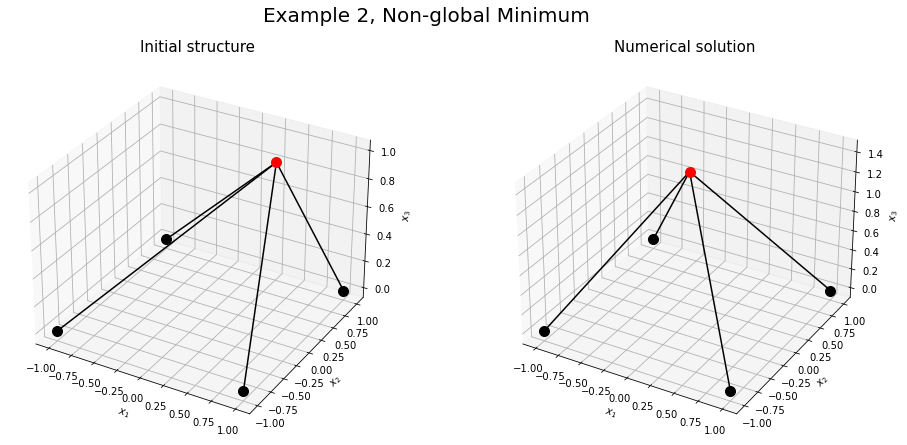

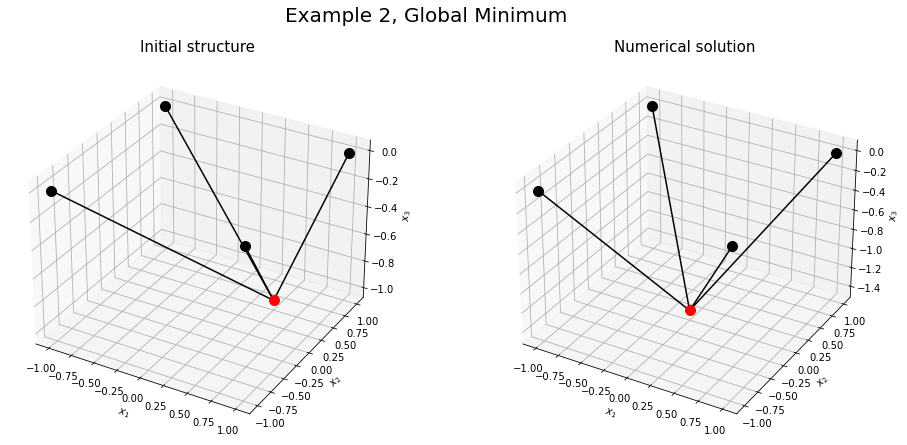

Energy upper pyramid: 5.656838249472153e-06
Energy lower pyramid: -5.656870249422051e-06
Error upper pyramid: 4.9303870234274195e-09
Error lower pyramid: 4.935021727981072e-09


In [5]:
fun = lambda X: energyTensegrityDomes(X, C2, B2, L2, el2, k = 0.1, c = 1, rhog = 1.e-6)
grad = lambda X: gradientTensegrityDomes(X, C2, B2, L2, el2, k = 0.1, c = 1, rhog = 1.e-6, M = M2)

# Plot "upper" and "lower" pyramid
X_upper_pyramid, error_vals = BFGS(fun, grad, X_dome_upper, M2, tol = 1.e-8)
X_lower_pyramid, error_vals = BFGS(fun, grad, X_dome_lower, M2, tol = 1.e-8)
plot_result(X_dome_upper.reshape(N2,3), X_upper_pyramid, C2, B2, N2, M2, title = 'Example 2, Non-global Minimum')
plot_result(X_dome_lower.reshape(N2,3), X_lower_pyramid, C2, B2, N2, M2, title = 'Example 2, Global Minimum')

# Check total energy
print("Energy upper pyramid:", fun(X_upper_pyramid.flatten()))
print("Energy lower pyramid:", fun(X_lower_pyramid.flatten()))

# Check final errors (norm of gradient):
print("Error upper pyramid:", np.linalg.norm(grad(X_upper_pyramid.flatten())))
print("Error lower pyramid:", np.linalg.norm(grad(X_lower_pyramid.flatten())))


Both structures are at a minima (gradient is close to zero), but the energy of the lower pyramid is lower than the energy of the upper pyramid.

## Free-standing Structures
### Example 1

# iterations = 2
# iterations = 0
# iterations = 5
# iterations = 43
# iterations = 35
# iterations = 98
# iterations = 100
# iterations = 27


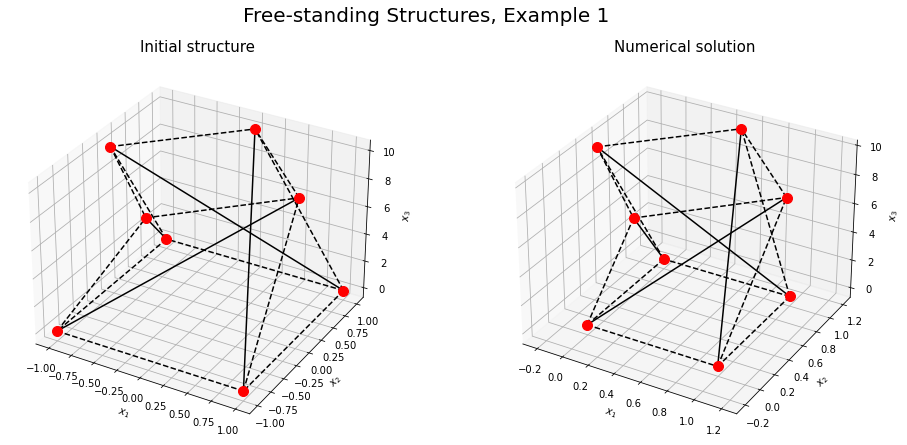

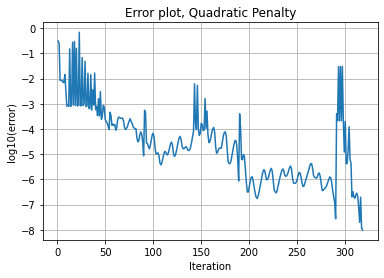


Numerical solution for the free nodes:
x1 = [ 9.99999752e-01  1.00000018e+00 -4.57126814e-05]
x2 = [-1.94429219e-03  1.00247034e+00 -4.57255001e-05]
x3 = [-4.41539370e-03  5.26313576e-04 -4.57381601e-05]
x4 = [ 9.97528639e-01 -1.94383559e-03 -4.57231891e-05]
x5 = [-0.21074097  0.49515775  9.64471479]
x6 = [ 0.50275635 -0.20827632  9.64472093]
x7 = [1.20618858 0.50522282 9.64473706]
x8 = [0.49269125 1.2086569  9.64473086]



In [6]:
from initialFreestructures import *

Q = lambda X, mu1_k, mu2_k: energyFreeStanding(X, C, B, L, el, k = 0.1, c = 1, rhog = 1.e-5, M = M, mu1 = mu1_k, mu2 = mu2_k)
Q_grad = lambda X, mu1_k, mu2_k: gradientFreeStanding(X, C, B, L, el, k = 0.1, c = 1, rhog = 1.e-5, M = M, mu1 = mu1_k, mu2 = mu2_k)

# Solve example 1
X, error_vals = quadraticPenalty(Q, Q_grad, X_init_1_free, M, mu1 = 1.e-3, mu2 = 1.e-5, tol = 1.e-8)
plot_result(X_init_1_free.reshape(N1,3), X, C, B, N1, M, title = 'Free-standing Structures, Example 1')
plot_error(error_vals, title="Error plot, Quadratic Penalty")
print_result(X, N1, M)

### Example 2 - Stacked Cubes

# iterations = 2
# iterations = 2
# iterations = 22
# iterations = 59
# iterations = 129
# iterations = 127
Error too large. Return current value.
# iterations = 421
# iterations = 53


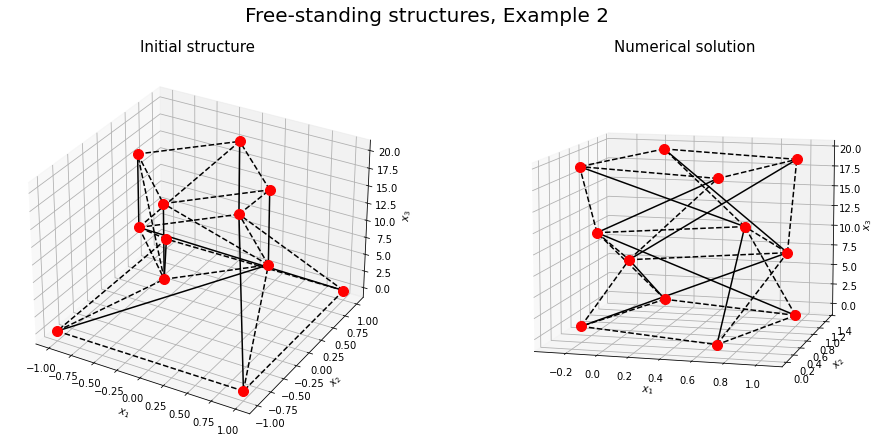

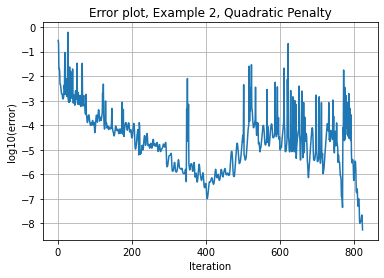

In [7]:
# Initial penalty parameters
mu1 = 1.e-3
mu2 = 1.e-4

Q = lambda X, mu1_k, mu2_k: energyFreeStanding(X, C2, B2, L2, el2, k = 0.1, c = 1, rhog = 1.e-6, M = M, mu1 = mu1_k, mu2 = mu2_k)
Q_grad = lambda X, mu1_k, mu2_k: gradientFreeStanding(X, C2, B2, L2, el2, k = 0.1, c = 1, rhog = 1.e-6, M = M, mu1 = mu1_k, mu2 = mu2_k)

X2, error_vals = quadraticPenalty(Q, Q_grad, X_init_2_free, M, mu1 = mu1, mu2 = mu2, tol = 1.e-8)
plot_result(X_init_2_free.reshape(N2,3), X2, C2, B2, N2, M, title = 'Free-standing structures, Example 2')
plot_error(error_vals, title="Error plot, Example 2, Quadratic Penalty")

The structure "twists around", and ends up in an equilibrium where the upper layer of nodes are twisted about 180 degrees compared to the bottom layer.